In [1]:
#imports
import yfinance as yf
import pandas as pd
import numpy as np
import streamlit as st
from PIL import Image
from urllib.request import urlopen
from MCForecastTools_copy import MCSimulation
import plost
import json
%matplotlib inline

In [2]:
#titles
st.title("Crypto Currency Daily Prices")
st.header("Main Dashboard")
st.subheader("you can add more crypto in code")




2022-12-05 00:32:42.484 
  command:

    streamlit run /Users/milluminatillc/opt/anaconda3/envs/pyviz_dev/lib/python3.7/site-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [3]:
Bitcoin = 'BTC-USD'
Ethereum = 'ETH-USD'
Ripple = 'XRP-USD'
Dogecoin = 'DOGE-USD'

In [4]:
# Download Stock Data

st.write("# Download Stock Data")

BTC = yf.download(Bitcoin, period="max", interval="1d")
ETH = yf.download(Ethereum, period="max", interval="1d")
XRP = yf.download(Ripple, period="max", interval="1d")
DOG = yf.download(Dogecoin, period="max", interval="1d")

BTC
ETH
XRP
DOG

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270
...,...,...,...,...,...,...
2022-12-01,0.106857,0.107381,0.101071,0.101584,0.101584,891639200
2022-12-02,0.101594,0.103260,0.097639,0.102148,0.102148,776013992
2022-12-03,0.102150,0.102823,0.098651,0.099824,0.099824,632114946


In [5]:
# Starting to clean dataframes and get them ready to concact
All_coins_hist_df = pd.concat([BTC, ETH, XRP, DOG],axis=1, keys=['BTC', 'ETH', 'XRP', 'DOG'])
All_coins_hist_df = All_coins_hist_df.dropna()

display(All_coins_hist_df.head())
display(All_coins_hist_df.tail())




BTC                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2017-11-09  7446.830078  7446.830078  7101.520020  7143.580078  7143.580078   
2017-11-10  7173.729980  7312.000000  6436.870117  6618.140137  6618.140137   
2017-11-11  6618.609863  6873.149902  6204.220215  6357.600098  6357.600098   
2017-11-12  6295.450195  6625.049805  5519.009766  5950.069824  5950.069824   
2017-11-13  5938.250000  6811.189941  5844.290039  6559.490234  6559.490234   

                               ETH                                      ...  \
                Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2017-11-09  3226249984  308.644989  329.451996  307.056000  320.884003  ...   
2017-11-10  5208249856  320.670990  324.717987  294.541992  299.252991  ...   
2017-11-11  4908680192  298.585999  319.453003  298.191986  314.681000  ...   
2017-11-12  8957349888  314.690002  319.153015  298.513000  307.907990  ...   
2017-11-13  6263249920  307.024994  328.415009  307.024994  316.716003  ...   

                 XRP                                        DOG            \
                 Low     Close Adj Close       Volume      Open      High   
Date                                                                        
2017-11-09  0.214866  0.217488  0.217488  147916992.0  0.001207  0.001415   
2017-11-10  0.205260  0.206483  0.206483  141032992.0  0.001421  0.001431   
2017-11-11  0.205459  0.210430  0.210430  134503008.0  0.001146  0.001257   
2017-11-12  0.195389  0.197339  0.197339  251175008.0  0.001189  0.001210   
2017-11-13  0.197456  0.203442  0.203442  132567000.0  0.001046  0.001212   

                                                     
                 Low     Close Adj Close     Volume  
Date                                                 
2017-11-09  0.001181  0.001415  0.001415  6259550.0  
2017-11-10  0.001125  0.001163  0.001163  4246520.0  
2017-11-11  0.001141  0.001201  0.001201  2231080.0  
2017-11-12  0.001002  0.001038  0.001038  3288960.0  
2017-11-13  0.001019  0.001211  0.001211  2481270.0  

[5 rows x 24 columns]

BTC                                            \
                    Open          High           Low         Close   
Date                                                                 
2022-12-01  17168.001953  17197.498047  16888.388672  16967.132812   
2022-12-02  16968.683594  17088.660156  16877.880859  17088.660156   
2022-12-03  17090.097656  17116.041016  16888.140625  16908.236328   
2022-12-04  16908.169922  17157.767578  16903.439453  17130.486328   
2022-12-05  17106.041016  17378.152344  17102.419922  17338.244141   

                                               ETH                            \
               Adj Close       Volume         Open         High          Low   
Date                                                                           
2022-12-01  16967.132812  22895392882  1295.769531  1295.999878  1267.708496   
2022-12-02  17088.660156  19539705127  1276.328613  1294.303345  1269.243164   
2022-12-03  16908.236328  16217776704  1294.456543  1299.840332  1241.431885   
2022-12-04  17130.486328  16824520830  1243.219238  1281.492310  1242.911743   
2022-12-05  17338.244141  19907803136  1278.610840  1300.966675  1278.192627   

                         ...       XRP                                   \
                  Close  ...       Low     Close Adj Close       Volume   
Date                     ...                                              
2022-12-01  1276.273926  ...  0.395475  0.396708  0.396708  742091191.0   
2022-12-02  1294.303345  ...  0.385505  0.396273  0.396273  778302835.0   
2022-12-03  1243.334839  ...  0.387611  0.388147  0.388147  496500336.0   
2022-12-04  1280.256592  ...  0.387541  0.390735  0.390735  450960651.0   
2022-12-05  1298.390991  ...  0.389750  0.394064  0.394064  580425792.0   

                 DOG                                                       
                Open      High       Low     Close Adj Close       Volume  
Date                                                                       
2022-12-01  0.106857  0.107381  0.101071  0.101584  0.101584  891639200.0  
2022-12-02  0.101594  0.103260  0.097639  0.102148  0.102148  776013992.0  
2022-12-03  0.102150  0.102823  0.098651  0.099824  0.099824  632114946.0  
2022-12-04  0.099811  0.105264  0.099806  0.104286  0.104286  759219556.0  
2022-12-05  0.104080  0.105162  0.103949  0.104861  0.104861  689177792.0  

[5 rows x 24 columns]

In [12]:
Monte_carlo_sim = MCSimulation(
    portfolio_data = All_coins_hist_df,
    weights = [0.40,0.30,0.10,0.20], #weights need to equal pie chart values
    num_simulation = 500,
    num_trading_days = 365*5 # The 5 will need to become a variable based off of what the user picks 5,10,15,20,25,30yrs
)

In [13]:
Monte_carlo_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/milluminatillc/Project-1-Repo-AQML/MCForecastTools_copy.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.970538,0.971423,1.003027,1.012336,1.049043,0.976083,1.026558,0.986205,1.030780,1.015614,...,1.036209,0.980720,0.992941,1.008435,1.068388,0.962171,1.036439,1.016752,0.986594,1.006295
2,1.000893,0.930687,0.990996,0.972109,1.045312,0.974869,1.013214,0.960349,1.004822,1.020337,...,1.067185,0.919759,0.996703,1.015650,1.055569,0.971074,1.040273,1.008349,0.949658,1.007502
3,1.031365,0.919917,0.979354,0.971187,1.024896,0.984483,1.051331,1.001645,0.991794,0.972495,...,1.158086,0.969196,0.971763,1.025459,1.114110,0.943988,1.026665,0.965831,0.972480,1.001793
4,1.083210,0.984120,0.962060,0.951657,0.986851,0.967152,1.013271,0.951436,1.048474,1.021185,...,1.127670,0.998598,0.965455,0.988773,1.146405,0.961177,0.971551,0.952904,0.961650,1.021000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,11.432122,29.708259,106.266575,8.684346,4.267253,153.421894,1863.975791,615.980574,127.758620,59.583078,...,277.390179,5.664180,99.912289,10.815425,86.602351,9.551020,9.348676,5.433501,113.075191,8.649133
1822,11.641219,29.094013,107.229696,8.631238,4.173695,155.962404,1859.502741,620.424620,129.284197,58.986512,...,291.678065,5.814033,105.080026,10.824196,86.207253,9.034864,9.567237,5.408734,110.050346,9.249291
1823,12.482687,29.143160,107.223866,8.358136,4.005263,155.450173,1856.309504,597.283193,136.355302,57.158378,...,302.336281,5.845189,99.649267,11.819003,89.057670,9.194499,9.232156,5.239637,117.659544,9.337014
1824,11.867368,30.782961,101.540125,7.795916,4.160942,151.883217,1925.600755,586.225860,136.629528,58.131268,...,291.030800,6.078312,103.468644,11.441593,90.860134,9.643643,9.705824,5.261961,117.727986,9.314106


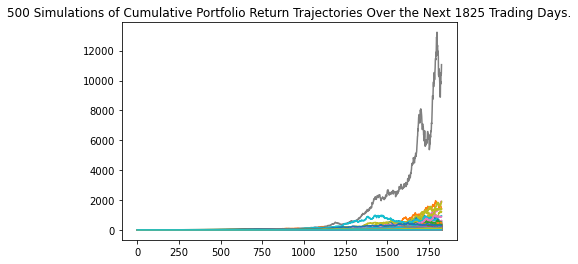

In [14]:
line_plot_5yr = Monte_carlo_sim.plot_simulation()

In [16]:
tbl_5yr = Monte_carlo_sim.summarize_cumulative_return()
print(tbl_5yr)

count             500.000000
mean              120.317534
std               524.384395
min                 0.528075
25%                17.173856
50%                40.757838
75%               117.464081
max             11062.923322
95% CI Lower        3.315469
95% CI Upper      475.902189
Name: 1825, dtype: float64


In [ ]:
MC_equal_dist_10year = MCSimulation(
    portfolio_data = All_coins_hist_df,
    weights = [0.20,0.20,0.20,0.20,0.20],
    num_simulation = 500,
    num_trading_days = 365*10
)

In [ ]:
MC_equal_dist_10year.calc_cumulative_return()

In [ ]:
line_plot_10yr = MC_equal_dist_10year.plot_simulation()

In [ ]:
tbl_10yr = MC_equal_dist_10year.summarize_cumulative_return()
print(tbl_10yr)

In [ ]:
MC_equal_dist_20year = MCSimulation(
    portfolio_data = All_coins_hist_df,
    weights = [asset_weights],
    num_simulation = 500,
    num_trading_days = 365*20
)

In [ ]:
MC_equal_dist_20year.calc_cumulative_return()

In [ ]:
line_plot_20yr = MC_equal_dist_20year.plot_simulation()

In [ ]:
tbl_20yr = MC_equal_dist_20year.summarize_cumulative_return()
print(tbl_10yr)

In [ ]:
# Ticker Data

BTC_Data =  yf.Ticker(Bitcoin)
ETH_Data =  yf.Ticker(Ethereum)
XRP_Data =  yf.Ticker(Ripple)
BCH_Data =  yf.Ticker(Bitcoincash)
ADA_Data = yf.Ticker(Cardano)


In [ ]:
BTC_Data

In [ ]:
# Stock - Info

st.write("# Stock - Info")
btc_info = BTC_Data.info
eth_info = ETH_Data.info
xrp_info = XRP_Data.info
bch_info = BCH_Data.info
ada_info = ADA_Data.info

btc_info.keys()
eth_info.keys()
xrp_info.keys()
bch_info.keys()
ada_info.keys()

In [ ]:
btc_info

In [ ]:
# Stock - Histories

st.write("# Stock - History")
btc_hist = BTC_Data.history(period="max")
eth_hist = ETH_Data.history(period="max")
xrp_hist = XRP_Data.history(period="max")
bch_hist = BCH_Data.history(period="max")
ada_hist = ADA_Data.history(period="max")


btc_hist


### Pie Chart section 
##### I will be using streamlit and Plost to build this Pie Chart.

In [ ]:
Annual_Salary = st.text_input("Please enter your annual Salary")



In [ ]:
record = ['rBiu2po3VWmD9N7XBMmGRpDe7qLwFTegyW', {'XRP':1000}]
record2 = ['an address', {'BTC':10}]
record_df = pd.DataFrame(columns=['Address', 'Asset'])#.to_csv('database.csv', sep = ',')
record_df.loc[len(record_df.index)] = record


In [ ]:
record_df

In [ ]:
records_2 = pd.read_csv('database.csv')

In [ ]:
record_df.loc[len(record_df.index)] = record2

In [ ]:
pd.read_csv('database.csv')

In [2]:
from PIL import Image
import pandas as pd
import base64
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import json
import time



def scrape_data():
    cmc = requests.get('https://www.coinmarketcap.com')
    soup = BeautifulSoup(cmc.content, 'html.parser')

    data = soup.find('script', id='__NEXT_DATA__', type='application/json')
    coins = {}
    coin_data = json.loads(data.contents[0])
    return coin_data
    #listings = coin_data['props']['initialState']['cryptocurrency']['listingLatest']['data']

In [29]:
coin_data = scrape_data()
json.loads(coin_data['props']['initialState'])['cryptocurrency']['listingLatest']['data']


[{'keysArr': ['ath',
   'atl',
   'circulatingSupply',
   'cmcRank',
   'dateAdded',
   'high24h',
   'id',
   'isActive',
   'isAudited',
   'lastUpdated',
   'low24h',
   'marketPairCount',
   'maxSupply',
   'name',
   'quote.BTC.dominance',
   'quote.BTC.fullyDilluttedMarketCap',
   'quote.BTC.lastUpdated',
   'quote.BTC.marketCap',
   'quote.BTC.marketCapByTotalSupply',
   'quote.BTC.name',
   'quote.BTC.percentChange1h',
   'quote.BTC.percentChange24h',
   'quote.BTC.percentChange30d',
   'quote.BTC.percentChange60d',
   'quote.BTC.percentChange7d',
   'quote.BTC.percentChange90d',
   'quote.BTC.price',
   'quote.BTC.selfReportedMarketCap',
   'quote.BTC.turnover',
   'quote.BTC.volume24h',
   'quote.BTC.volume30d',
   'quote.BTC.volume7d',
   'quote.BTC.ytdPriceChangePercentage',
   'quote.ETH.dominance',
   'quote.ETH.fullyDilluttedMarketCap',
   'quote.ETH.lastUpdated',
   'quote.ETH.marketCap',
   'quote.ETH.marketCapByTotalSupply',
   'quote.ETH.name',
   'quote.ETH.percentC

In [ ]:
price_data = requests.get(base_url).json()